In [366]:
from PIL import Image, ImageDraw

In [367]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


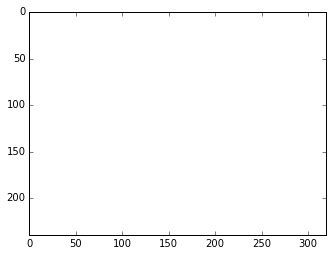

In [368]:
scene = Image.new('RGBA', (320, 240))
imshow(asarray(scene))

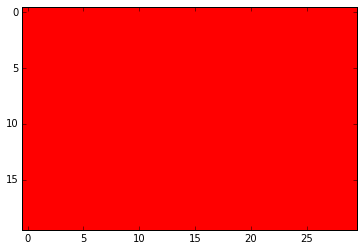

In [369]:
obj = Image.new('RGBA', (30,20), (255,0,0,255))
objBounds = numpy.array([[0,obj.size[0],obj.size[0],0],[0,0,obj.size[1],obj.size[1]],[1,1,1,1]])
imshow(asarray(obj))

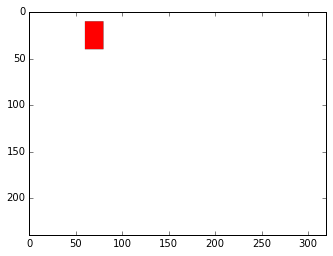

In [370]:
objAngle = pi/2
objTransform = numpy.array([[cos(objAngle),sin(objAngle), 60],[-sin(objAngle), cos(objAngle), 40],[0,0,1]])
objView = obj.transform(scene.size, Image.AFFINE, linalg.inv(objTransform).flatten()[:7])
imshow(objView)

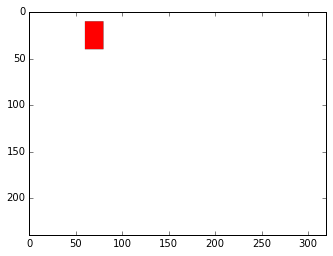

In [371]:
scene.paste(objView, (0,0))
imshow(asarray(scene))

In [372]:
camAngle = pi/2
camTransform = numpy.array([[cos(camAngle),sin(camAngle), -20],[-sin(camAngle), cos(camAngle), 40],[0,0,1]])

In [373]:
camSize = (180,120)
camBounds = numpy.array([[0,camSize[0],camSize[0],0],[0,0,camSize[1],camSize[1]],[1,1,1,1]])
transformedCamBounds = dot(dot(objTransform, camTransform), camBounds)
polygon = transformedCamBounds[:2,:].T.flatten()
print polygon

[ 100.   60.  -80.   60.  -80.  -60.  100.  -60.]


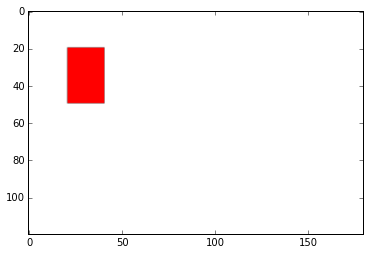

In [374]:
camera = scene.transform(camSize, Image.AFFINE, dot(objTransform, camTransform).flatten()[:7])
imshow(asarray(camera))

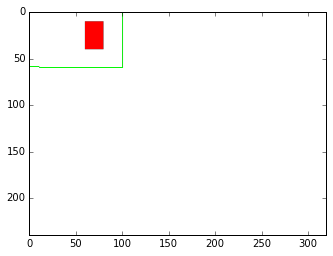

In [375]:
sceneDraw = ImageDraw.ImageDraw(scene)
#sceneDraw.rectangle(tuple([0,0] + list(camSize)))
sceneDraw.polygon(map(int,polygon), outline=(0,255,0))
imshow(scene)

In [376]:
camObjBounds = dot(linalg.inv(camTransform), objBounds)
print camObjBounds

[[ 40.  40.  20.  20.]
 [ 20.  50.  50.  20.]
 [  1.   1.   1.   1.]]


In [377]:
sceneObjBounds = dot(objTransform, objBounds)
print sceneObjBounds

[[ 60.  60.  80.  80.]
 [ 40.  10.  10.  40.]
 [  1.   1.   1.   1.]]
